<center><span style="font-size:25px;">ПРОНОЗИРОВАНИЕ ОТТОКА КЛИЕНТОВ БАНКА</span></center>

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

**Задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.

Напомним значения столбцов таблицы:

<b>
<table style="width: 70%; background: lightgray; color: black; padding: 0.2em; border-collapse: collapse; box-shadow: 5px 5px 10px darkgray; margin: 0px auto; border: 1px solid #b0b0b0;">
<tbody>
<tr>
<td style="width: 15%; text-align: center; vertical-align: middle; background-color: #10564f; border: 1px solid #b0b0b0; padding: 0.2em;"><span style="color: #ffffff;">Название</span></td>
<td style="width: 85%; text-align: center; vertical-align: middle; background-color: #10564f; border: 1px solid #b0b0b0; padding: 0.2em;"><span style="color: #ffffff;">Расшифровка</span></td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">RowNumber</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">номер строки таблицы</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">CustomerId</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">идентификатор клиента</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">Surname</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">фамилия клиента</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">CreditScore</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">Geography</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">страна проживания клиента (банк межнациональный)</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">Gender</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">пол клиента</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">Age</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">возраст клиента</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">Tenure</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">сколько лет клиент пользуется банком</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">Balance</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">сколько у клиента денег на счетах в банке</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">NumOfProduct</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">число услуг банка, которыми воспользовался клиент</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">HasCrCard</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">есть ли у клиента кредитная карта (1 — да, 0 — нет)</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">IsActiveMember</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">есть ли у клиента статус «активный клиент» (1 — да, 0 — нет)</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">EstimatedSalary</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">предполагаемая заработная плата клиента</td>
</tr>
<tr>
<td style="width: 15%; text-align: left; border: 1px solid #b0b0b0; padding: 0.4em;">Exited</td>
<td style="width: 85%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.4em;">статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент)</td>
</tr>
</tbody>
</table>
</b>

Проект был сделан на `Python 3.11.6`

<h2 id='contents'>Оглавляшка:</h2>

* [Загружаемые библиотеки](#libs)
* [Загрузка данных](#dataload)
* [Небольшой разведывательный анализ](#littleeda)
* [Практика: логистическая регрессия](#logisticregr)
    * [Выбор части данных для тестов](#choosecountry)
    * [Предобработка данных и деление на train и test](#ex_5_1)
    * [Стандартизация признаков](#ex_5_2)
    * [Выбор метрики](#ex_5_3)
    * [Логистическая регрессия с ручным подбором параметров](#ex_5_4)
    * [Обучение логистической регресси на полиномиальных признаках третьей степени](#ex_5_5)
    * [Подбор порога вероятности для логистической регрессии](#ex_5_6)
* [Практика: деревья решений и случайный лес](#treespractice)
    * [Обучение дерева решений без параметров](#ex_8_1)
    * [Стрижка дерева решений](#ex_8_2)
    * [Обучение модели случайного леса](#ex_8_3)
    * [Подбор порога вероятности для случайного леса](#ex_8_4)
    * [Предсказание на новых данных](#ex_8_5)
* [Дополнительное исследование](#addresearch)

## Загружаемые библиотеки <a id='libs'></a>

In [ ]:
from data.functions_akialema import *

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold

%matplotlib inline
plt.style.use('seaborn-v0_8')

## Загрузка данных <a id='dataload'></a>

[↑ contents](#contents)

In [2]:
churn_data = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1a06RP67HgLlvGBPYrZ2vdkMo1HhwwnDR')

my_info(churn_data)

memory usage: 2.8 MB


,column,num of unique vals,type,mode,number of entries,NaN vals,number of dublics,describe
0,Exited,2,int64,0,10000,0,0,min...: 0.0max..: 1.0mean: 0.2std....: 0.4
1,Gender,2,object,Male,10000,0,0,see type column
2,HasCrCard,2,int64,1,10000,0,0,min...: 0.00max..: 1.00mean: 0.71std....: 0.46
3,IsActiveMember,2,int64,1,10000,0,0,min...: 0.00max..: 1.00mean: 0.52std....: 0.50
4,Geography,3,object,France,10000,0,0,see type column
5,NumOfProducts,4,int64,1,10000,0,0,min...: 1.00max..: 4.00mean: 1.53std....: 0.58
6,Tenure,11,int64,2,10000,0,0,min...: 0.00max..: 10.00mean: 5.01std....: 2.89
7,Age,70,int64,37,10000,0,0,min...: 18.00max..: 92.00mean: 38.92std....: 10.49
8,CreditScore,460,int64,850,10000,0,0,min...: 350.00max..: 850.00mean: 650.53std....: 96.65
9,Surname,2932,object,Smith,10000,0,0,see type column


На первый взгляд можно наблюдать:

- 3 признака для кодировани;
- 2 признака с 100% уникальностью;
- дублей нет;
- пропусков нет;

В остальном.. данные выглядят не плохо.

## Небольшой разведывательный анализ <a id='littleeda'></a>

[↑ contents](#contents)

Построю несколько графиков, чтобы посмотреть на распределения в данных.

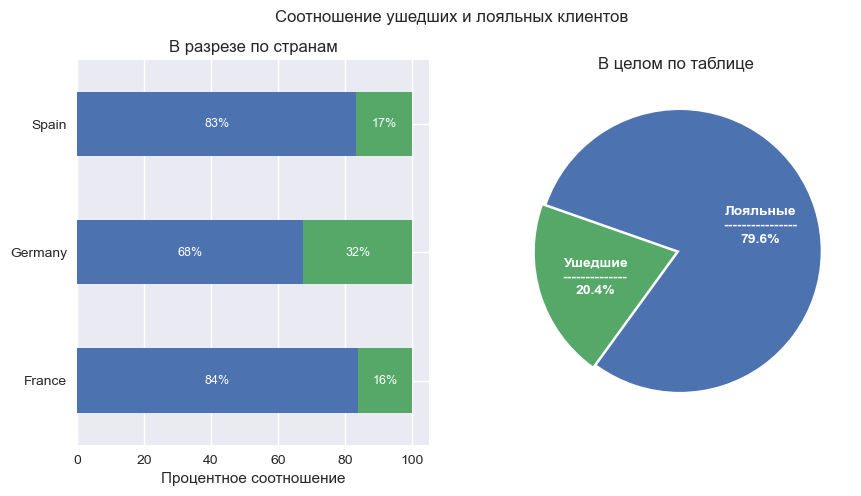

In [ ]:
df_for_this_cell = churn_data['Exited'].value_counts(normalize=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.suptitle('Соотношение ушедших и лояльных клиентов')

(churn_data.groupby(['Geography'])['Exited'].value_counts(normalize=True) * 100).unstack().rename(columns={0: 'Лояльные', 1: 'Ушедшие'}).plot(kind='barh', stacked=True, ax=ax[0], legend=False)
ax[0].set(xlabel='Процентное соотношение', ylabel='', title='В разрезе по странам')
[ax[0].bar_label(ax[0].containers[i], fmt="%.0f%%", fontsize=9, label_type='center', color='white') for i in range(len(ax[0].containers))]

ax[1].pie(x=df_for_this_cell,
            autopct=custom_autopct, explode=[0.03,0],
            textprops={'color': 'white', 'weight': 'bold', 'fontsize': 10}, startangle=234)
ax[1].set(title='В целом по таблице')

plt.show()

По таргету можно наблюдать дисбаланс классов. В немецких филиалах отток больше, чем в филиалах соседних стран.

Далее интересно посмотреть на следующие распределения:

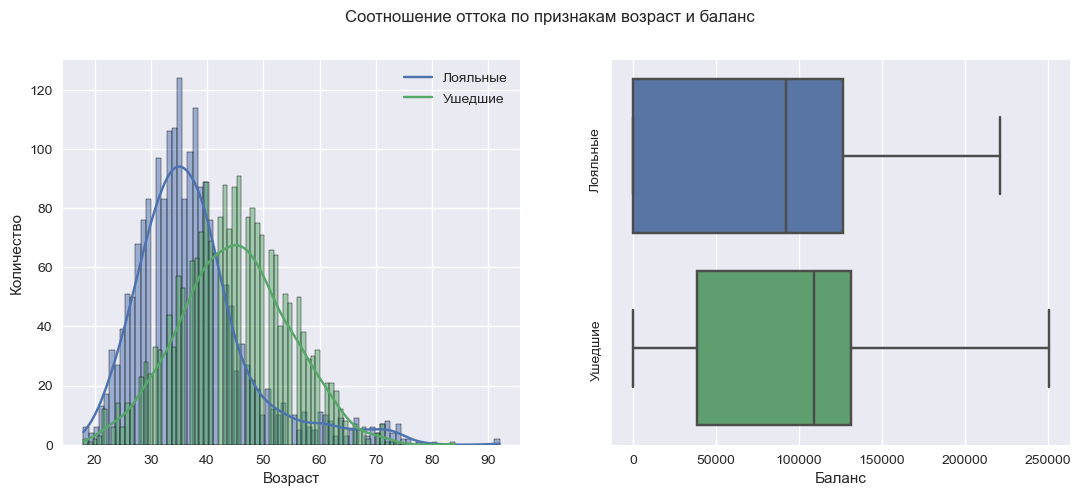

In [39]:
fig, ax = plt.subplots(ncols=2, figsize=(13, 5))

# Я взял sample = размер таргета по ушедшим, чтобы гистограммы были одинаковые по размеру
sns.histplot(churn_data[churn_data['Exited'] == 0]['Age'].sample(n=2037, random_state=42), bins=80, kde=True, ax=ax[0])
sns.histplot(churn_data[churn_data['Exited'] == 1]['Age'], bins=80, kde=True, ax=ax[0])
sns.boxplot(churn_data, x='Balance', y='Exited', ax=ax[1], orient='h')

ax[0].legend(['Лояльные', 'Ушедшие'])
ax[0].set(xlabel='Возраст', ylabel='Количество')
ax[1].set(xlabel='Баланс', yticks=[-0.13, 0.87], ylabel='')
ax[1].set_yticklabels(['Лояльные', 'Ушедшие'], rotation=90)
plt.suptitle('Соотношение оттока по признакам возраст и баланс')
plt.show()

Можно сделать вывод, что уходят в основном люди по-старше.  
Средний возраст лояльных в районе 35 лет, а средний возраст ушедших - в районе 45.  
По балансу, казалось бы, можно было бы сказать, что уходят более богатые люди, т.е. те, у которых больше баланс на счету, но!

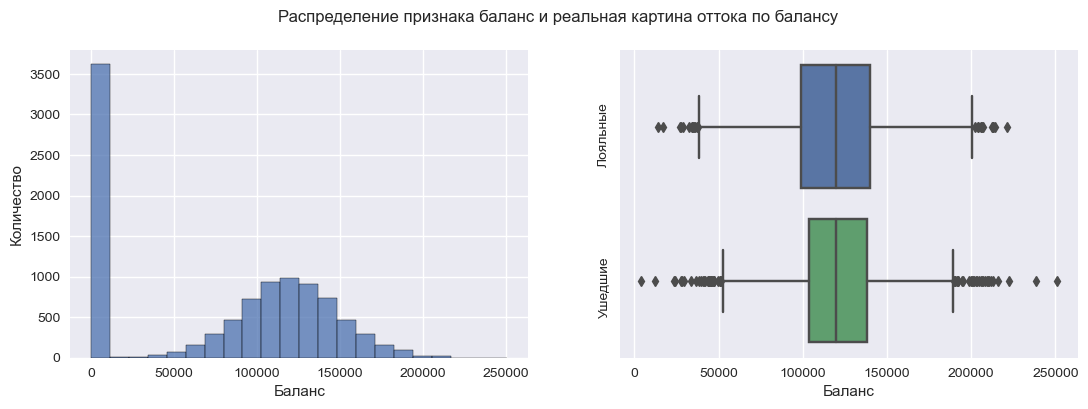

In [5]:
df_for_this_cell = churn_data[churn_data['Balance'] > 0]

fig, ax = plt.subplots(ncols=2, figsize=(13, 4))
sns.histplot(churn_data['Balance'], ax=ax[0])
sns.boxplot(df_for_this_cell, x='Balance', y='Exited', ax=ax[1], orient='h')

ax[0].set(xlabel='Баланс', ylabel='Количество')
ax[1].set(xlabel='Баланс', ylabel='', yticks=[-0.13, 0.87])
ax[1].set_yticklabels(['Лояльные', 'Ушедшие'], rotation=90)

plt.suptitle('Распределение признака баланс и реальная картина оттока по балансу')
plt.show()

В признаке `Balance` очень много нулевых записей. Если смотреть на данные, отличные от нуля, то признак распределён нормально и нет явных признаков для заключения, что "уходят более богатые клиенты".

In [6]:
print('Количество нулевых записей в разрезе целевого признака:')
churn_data.loc[churn_data['Balance'] == 0, 'Exited'].value_counts()

Количество нулевых записей в разрезе целевого признака:


Exited
0    3117
1     500
Name: count, dtype: int64

Так же можно посмотреть на отток в разрезе признаков `Пол`, `Количество приобретённых продуктов`, `Статус клиента: активный или нет`:

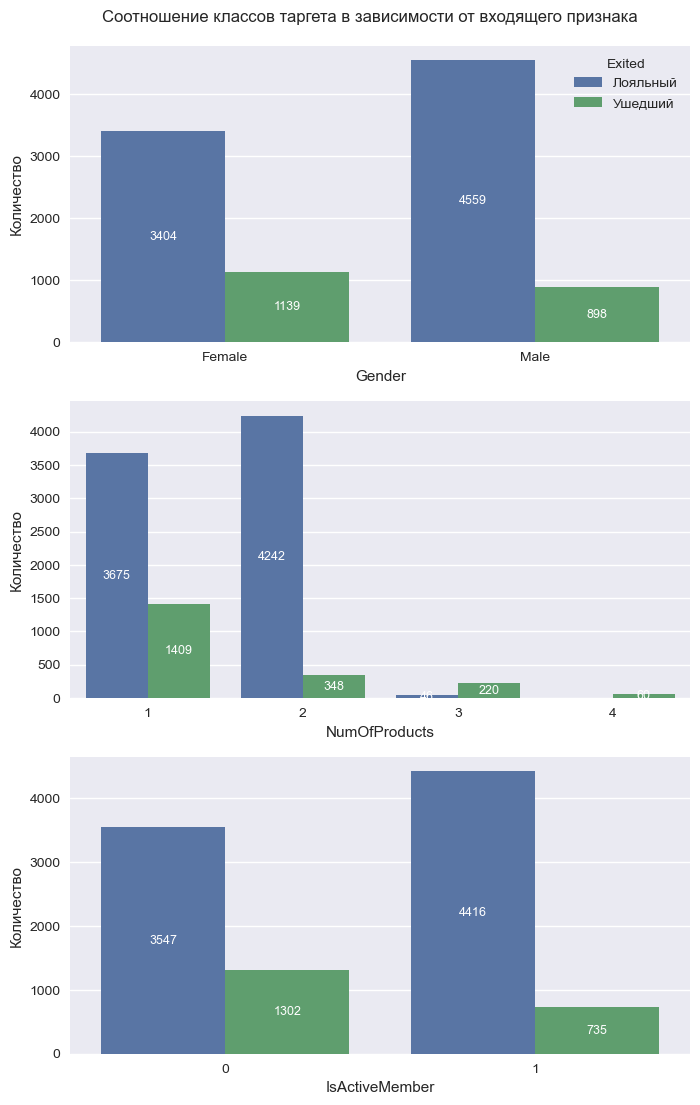

In [7]:
cols_to_analysis = ['Gender', 'NumOfProducts', 'IsActiveMember']

fig, ax = plt.subplots(nrows=3, figsize=(8, 12))

plt.subplots_adjust(top=0.95) # чтобы заголовок не налезал на графики

for index, feature in enumerate(cols_to_analysis):
    
    df_for_this_cell = churn_data.groupby(feature)['Exited'].value_counts().unstack().reset_index().melt(id_vars=feature, value_vars=[0, 1], var_name='Exited', value_name='Count')
    df_for_this_cell = df_for_this_cell.assign(Exited=df_for_this_cell['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший'))
    
    sns.barplot(df_for_this_cell, x=feature, y='Count', hue='Exited', ax=ax[index])
    
    [ax[index].bar_label(ax[index].containers[i], fmt="%.0f", fontsize=9, label_type='center', color='white') for i in range(len(ax[index].containers))]
    ax[index].set(ylabel='Количество')
    if index > 0:
        ax[index].legend('')

plt.suptitle('Соотношение классов таргета в зависимости от входящего признака')
plt.show()

- Отток по половому признаку не такой сущственный;
- По количеству продуктов видно, что:
    * 2-й пакет услуг - оптимальный для данного банка.  
    * Базовый уровень - комфортный, но наблюдается большой отток.  
    * Больше 2-х - лишнее, спросом особо не пользуется и там отток преобладает;
- Статус активного мембера положительно влияет на лояльность и уменьшает отток.

И напоследок можно взглянуть на тепловую карту зависимости `оттока` от `кредитного рейтинга` и `количества лет членства`.

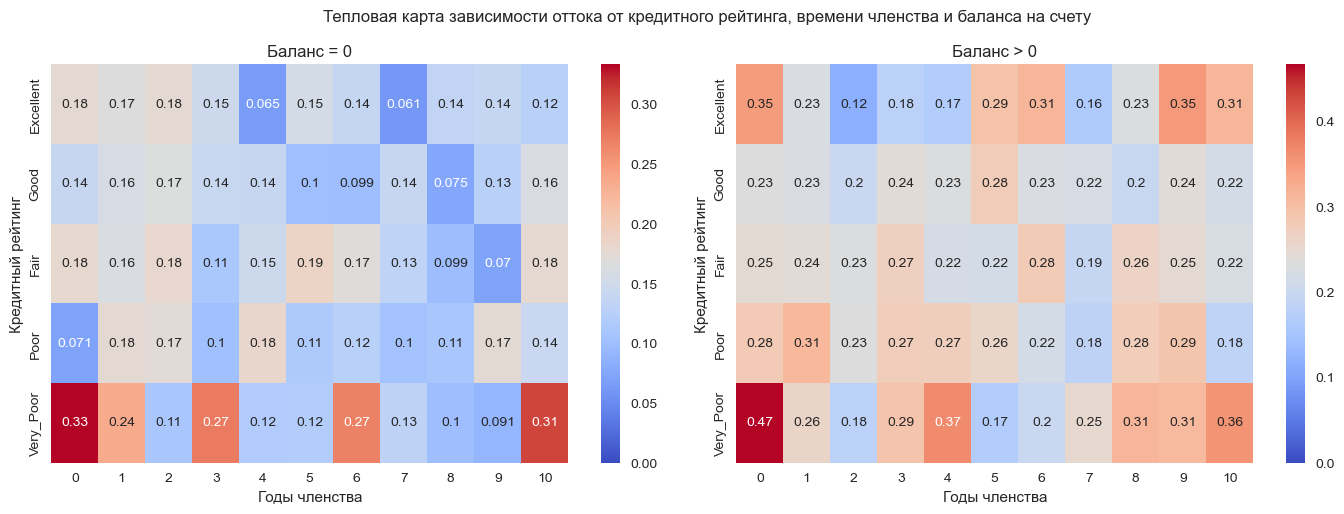

In [8]:
list_of_interest = [churn_data[churn_data['Balance'] == 0], churn_data[churn_data['Balance'] > 0]]


fig, ax = plt.subplots(ncols=2, figsize=(14, 5))

fig.tight_layout(w_pad=0, h_pad=3) # расстояние между подграфиками
plt.subplots_adjust(top=0.87) # чтобы заголовок не налезал на графики

for i, j in enumerate(list_of_interest):
    
    df_for_this_cell = j.pivot_table(values='Exited',
                                     index=pd.cut(j['CreditScore'], 
                                                  bins=[0, 300, 500, 601, 661, 781, 851, 1000], 
                                                  right=False, 
                                                  labels=['Deep', 'Very_Poor', 'Poor', 'Fair', 'Good', 'Excellent', 'Top']),
                                     columns='Tenure',
                                     aggfunc='mean').sort_index(ascending=False)
    
    sns.heatmap(df_for_this_cell, cmap='coolwarm', annot=True, ax=ax[i], vmin=0)
    ax[i].set_title('Баланс = 0' if i == 0 else 'Баланс > 0')
    ax[i].set(xlabel='Годы членства', ylabel='Кредитный рейтинг')

plt.suptitle('Тепловая карта зависимости оттока от кредитного рейтинга, времени членства и баланса на счету')
plt.show()

Что интересно. Помимо ожидаемого, что люди с плохим кр.рейтингом уходят чаще всех, интересен факт того, что люди с положительным балансом уходят чаще людей с нулевым балансом. Можно было бы сказать, что люди с положительным балансом более активные, потому они более требовательные к сервису/сам банка, всяким кредитам и прочим плюшкам, и типа если что-то малейшее не нравится, то они уходят в другой банк и т.д. Но если взглянуть на графики ниже, то..

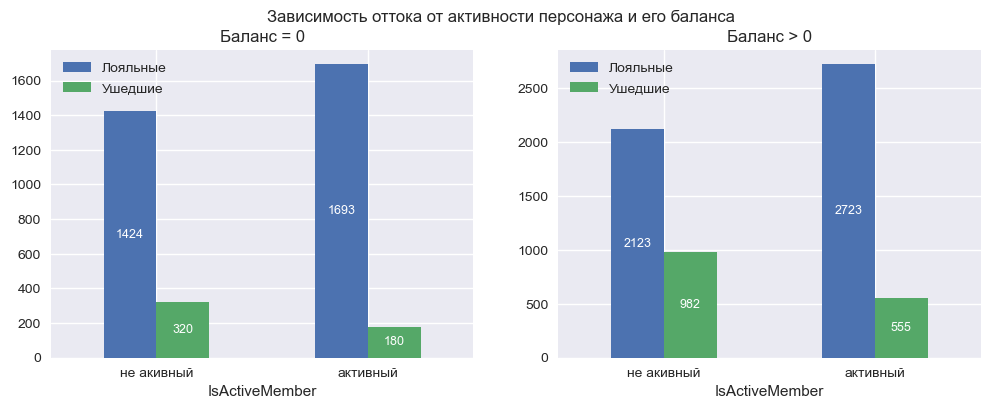

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

churn_data.loc[churn_data['Balance'] == 0, :].groupby('IsActiveMember')['Exited'].value_counts().unstack().plot(kind='bar', stacked=False, ax=ax[0])
churn_data.loc[churn_data['Balance'] > 0, :].groupby('IsActiveMember')['Exited'].value_counts().unstack().plot(kind='bar', stacked=False, ax=ax[1])
[ax[0].bar_label(ax[0].containers[i], fmt="%.0f", fontsize=9, label_type='center', color='white') for i in range(len(ax[0].containers))]
[ax[1].bar_label(ax[1].containers[i], fmt="%.0f", fontsize=9, label_type='center', color='white') for i in range(len(ax[1].containers))]
ax[0].set(title='Баланс = 0')
ax[1].set(title='Баланс > 0')
ax[0].legend(['Лояльные','Ушедшие'])
ax[1].legend(['Лояльные','Ушедшие'])
ax[0].set_xticklabels(labels=['не акивный', 'активный'], rotation=0)
ax[1].set_xticklabels(labels=['не акивный', 'активный'], rotation=0)

plt.suptitle('Зависимость оттока от активности персонажа и его баланса')
plt.show()

У не активных так то отток выше, чем у активных. Пропорция сохраняется вне зависимости от того какой там у кого баланс. Кроме не активных с балансом > 0. Видимо, они и делают тепловую карту зависимости оттока от кредитного рейтинга именно такой.

Таким образом, сам по себе положительный баланс не гарантирует лояльность — скорее наоборот, в сочетании с низкой активностью он указывает на потенциально "остывшего", недовольного или просто не вовлечённого клиента с ресурсами для ухода.

Можно копнуть глубже, вычислить по фамилии всех не активных и ушедших, пробить по IP..)) Но разведывательный анализ у меня не большой, беглый, потому перейду к практике моделирования и предсказания классификации клиентов.

## Практика: логистическая регрессия <a id='logisticregr'></a>

[↑ contents](#contents)

<h3 id='choosecountry'>Выбор части данных для тестов</h3>

[Отток](#littleeda) в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [3]:
models_df = churn_data[churn_data['Geography'] == 'Germany']
models_df.shape

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [4]:
models_df = models_df.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
models_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [5]:
my_info(models_df)

memory usage: 356.2 KB


,column,num of unique vals,type,mode,number of entries,NaN vals,number of dublics,describe
0,Exited,2,int64,0,2509,0,0,min...: 0.00max..: 1.00mean: 0.32std....: 0.47
1,Gender,2,object,Male,2509,0,0,see type column
2,HasCrCard,2,int64,1,2509,0,0,min...: 0.00max..: 1.00mean: 0.71std....: 0.45
3,IsActiveMember,2,int64,0,2509,0,0,min...: 0.0max..: 1.0mean: 0.5std....: 0.5
4,NumOfProducts,4,int64,1,2509,0,0,min...: 1.00max..: 4.00mean: 1.52std....: 0.62
5,Tenure,11,int64,2,2509,0,0,min...: 0.00max..: 10.00mean: 5.01std....: 2.94
6,Age,64,int64,37,2509,0,0,min...: 18.00max..: 84.00mean: 39.77std....: 10.52
7,CreditScore,418,int64,850,2509,0,0,min...: 350.00max..: 850.00mean: 651.45std....: 98.17
8,Balance,2508,float64,130170.82,2509,0,0,min...: 27288.43max..: 214346.96mean: 119730.12std....: 27022.01
9,EstimatedSalary,2509,float64,11.58,2509,0,0,min...: 11.58max..: 199970.74mean: 101113.44std....: 58263.01


Обращу внимание, что выбранная нами таблица не содержит пропусков и дубликатов. Так же в некоторых столбцах наблюдается большое количество уникальных элементов. В тех же столбцах наблюдается большой масштаб данных.

[↑ contents](#contents)

<h3 id='ex_5_1'>Предобработка данных и деление на train и test</h3>

Для начала расширим датасет с помощью методов `Feature Engineering`.  
Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

In [6]:
# Создание указанных признаков.
models_df['BalanceSalaryRatio'] = models_df['Balance'] / models_df['EstimatedSalary']
models_df['TenureByAge'] = models_df['Tenure'] / models_df['Age']
models_df['CreditScoreGivenAge'] = models_df['CreditScore'] / models_df['Age']

# Кодирование категориальных столбцов.
models_df['Gender'] = models_df['Gender'].map({'Female': 0, 'Male': 1})

# Основные статистические характеристики новоиспечённых стролбцов.
pd.concat([models_df.iloc[:,-3:], models_df['Gender']], axis=1).describe()

,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender
count,2509.000000,2509.000000,2509.000000,2509.000000
mean,9.024870,0.134303,17.526487,0.524512
std,214.286020,0.087680,5.349558,0.499498
min,0.192582,0.000000,6.112676,0.000000
25%,0.783284,0.060606,13.686275,0.000000
50%,1.197220,0.125000,16.857143,1.000000
75%,2.400083,0.200000,20.852941,1.000000
max,10614.655440,0.500000,46.388889,1.000000


Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [7]:
X = models_df.drop("Exited", axis=1)
y = models_df["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

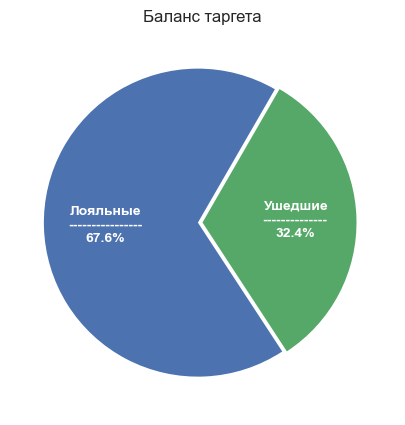

In [10]:
df_for_this_cell = y.value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(10, 5))

ax.pie(x=df_for_this_cell,
       autopct=custom_autopct, explode=[0.03,0],
       textprops={'color': 'white', 'weight': 'bold', 'fontsize': 10}, startangle=60)
ax.set_title('Баланс таргета')
plt.show()

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


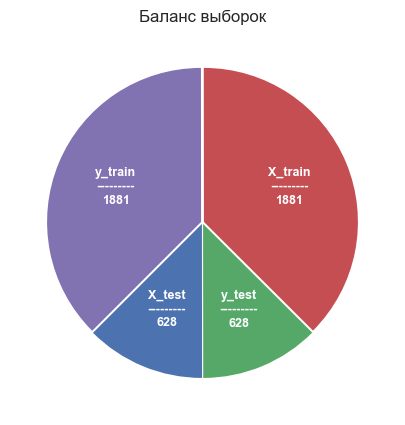

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

plot_train_test_split_balance(X_train, X_test, y_train, y_test, startangle=225).show()

Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

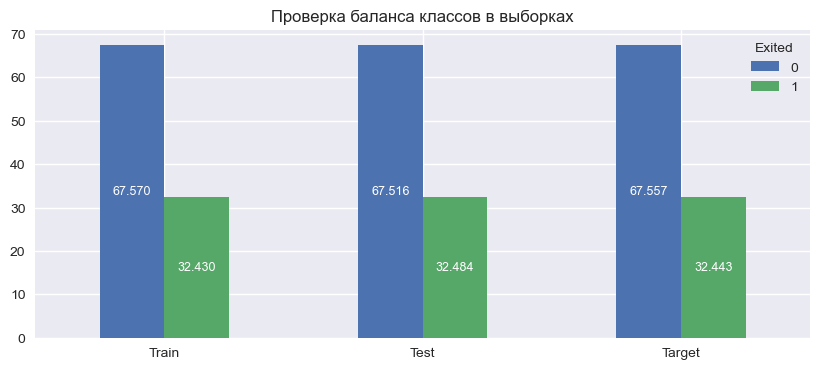

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))

pd.DataFrame([y_train.value_counts(normalize=True)*100, 
              y_test.value_counts(normalize=True)*100, 
              y.value_counts(normalize=True)*100], 
             index=['Train', 'Test', 'Target']).plot(kind='bar', ax=ax)
[ax.bar_label(ax.containers[i], fmt="%.3f", fontsize=9, label_type='center', color='white') for i in range(len(ax.containers))]
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0)
ax.set_title('Проверка баланса классов в выборках')

plt.show()

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

[↑ contents](#contents)

<h3 id='ex_5_2'>Стандартизация признаков</h3>

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

In [17]:
scaler_minmax = RobustScaler().fit(X_train.to_numpy())
scaler_standard = StandardScaler().fit(X_train.to_numpy())

# Производим масштабирование тренировочной и тестовой выборок.
X_train_scaled = scaler_minmax.transform(X_train.to_numpy())
X_test_scaled = scaler_minmax.transform(X_test.to_numpy())

# Я подсмотрел, что можно после нормализации провести ещё и стандартизацию (в пачке), и метрика улучшится.
X_train_scaled_standartized = scaler_standard.transform(X_train_scaled)
X_test_scaled_standartized = scaler_standard.transform(X_test_scaled)

[↑ contents](#contents)

<h3 id='ex_5_3'>Выбор метрики</h3>

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов - ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


Ответ: 
<blockquote>

Согласно условию, что нам необходимо минимизировать ложные срабатывания, как со знаком +, так и со знаком -, мой ответ: $F_{1}$ мера.

Рассуждений у меня не много. Я просто открыл табличку с метриками и... 
- Для `accuracy` нам не хватает баланса в классе, 
- `precision` стремится минимизировать ложноположительные срабатывания, 
- а `recall` - ложноотрицательные. 

И раз уж мы говорим об одной какой-то метрике, а не о переборе нескольких, то мой ответ - среднее гармоническое: $F_{1}$ мера.  
(Хотя `classification_report` всё равно будет содержать все метрики, но я акцентирую именно на $F_{1}$ мере табличкой)
</blockquote>

[↑ contents](#contents)

<h3 id='ex_5_4'>Логистическая регрессия с ручным подбором параметров</h3>

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?


<blockquote>

**Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.
</blockquote>

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации (`l1` — $L_1$-регуляризация, `l2` — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

In [18]:
# Строю модель на только scaled данных.
log_model_5_4 = LogisticRegression(random_state=42, penalty='l2', C=1, max_iter=1000).fit(X_train_scaled, y_train)

y_train_pred_5_4 = log_model_5_4.predict(X_train_scaled)
y_test_pred_5_4 = log_model_5_4.predict(X_test_scaled)

#print(metrics.classification_report(y_train, y_train_pred_5_4))
#print(metrics.classification_report(y_test, y_test_pred_5_4))
print('F1 sore 5.4:')
pd.DataFrame(
    [[f1_score(y_train, y_train_pred_5_4, pos_label=0), f1_score(y_train, y_train_pred_5_4)],
     [f1_score(y_test, y_test_pred_5_4, pos_label=0), f1_score(y_test, y_test_pred_5_4)]],
    index=['Train', 'Test']
).T.round(2)

F1 sore 5.4:


,Train,Test
0,0.82,0.81
1,0.51,0.50


<blockquote>

Ваши выводы и рассуждения — *здесь*.
<blockquote>

Я попробовал все шкалёры. Переключал солверы, значение С.. Везде +/- всё одинаковое. Если поставить MinMax и С=5, то будет такой же f1, как и Robust с С=1: 0.51, 0.50. Саги и регуляторы особо ничего радикального не показали. Ни l1, ни l2, ни elastic.. Просто плаваю.))  
И. Я затрудняюсь ответить на вопрос о степени обученности модели, т.к. в примечании сказано: "меньше 0.5". А у меня "равно 0.5".)
</blockquote>

[↑ contents](#contents)

<h3 id='ex_5_5'>Обучение логистической регресси на полиномиальных признаках третьей степени</h3>

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации (`l1` — $L_1$-регуляризация, `l2` — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

In [19]:
# Создаю полиномиальные признаки третьей степени на нормализованных и стандартизированных данных.
poly_5_5 = PolynomialFeatures(degree=3, include_bias=False).fit(X_train_scaled_standartized)
X_train_poly = poly_5_5.transform(X_train_scaled_standartized)
X_test_poly = poly_5_5.transform(X_test_scaled_standartized)

# Обучаю модель логистической регрессии с использованием стохастического градиентного спуска в качестве алгоритма оптимизации.
# С коэффициентом регуляризации 3 и макс кол-вом итераций в 10к.
log_model_5_5 = LogisticRegression(random_state=42, solver='sag', penalty='l2', C=3, max_iter=10000).fit(X_train_poly, y_train)

y_train_pred_5_5 = log_model_5_5.predict(X_train_poly)
y_test_pred_5_5 = log_model_5_5.predict(X_test_poly)

#print(metrics.classification_report(y_train, y_train_pred_5_5))
#print(metrics.classification_report(y_test, y_test_pred_5_5))
print('F1 sore 5.5:')
pd.DataFrame(
    [[f1_score(y_train, y_train_pred_5_5, pos_label=0), f1_score(y_train, y_train_pred_5_5)],
     [f1_score(y_test, y_test_pred_5_5, pos_label=0), f1_score(y_test, y_test_pred_5_5)]],
    index=['Train', 'Test']
).T.round(2)

F1 sore 5.5:


,Train,Test
0,0.85,0.83
1,0.60,0.58


<blockquote>

Ваши выводы и рассуждения — *здесь*.
<blockquote>

В качестве вывода отмечу, что с помощью дополнительной стандартизации и добавлением полиномиальных признаков удалось улучшить метрику F1. Пробовал играть с коэффициентом регуляризации. Для себя отметил, что для данной задачи, с увеличением этого коэффициента - улучшается метрика. Перебор солверов и регуляризаторов не привели меня к радикальному улучшению. Но, возможно, я попробовал не всё.
</blockquote>

[↑ contents](#contents)

<h3 id='ex_5_6'>Подбор порога вероятности для логистической регрессии</h3>

Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности `threshold`:
    * Сделать предсказание класса по принципу: если `вероятность > threshold`, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


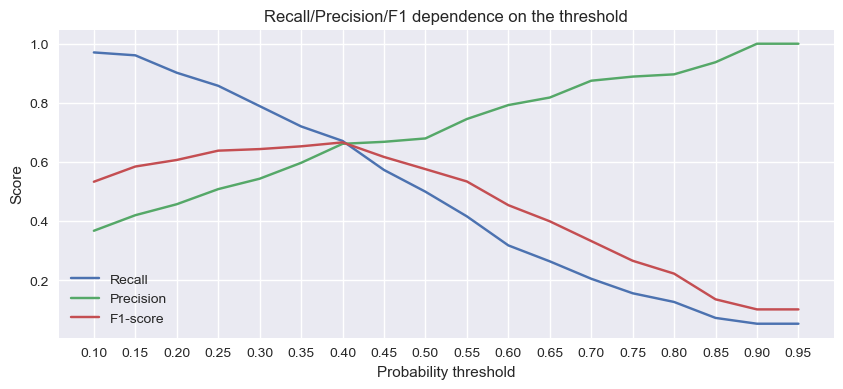

In [20]:
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки.
# Использую модель, обученную на полиномиальных признаках.
y_test_proba_pred = pd.Series(log_model_5_5.predict_proba(X_test_poly)[:, 1])

rpf_threshold_dependence(y=y_test, y_proba=y_test_proba_pred).show()

С увеличением вероятностного порога увеличивается `precision` и уменьшается `recall`. При повышении точности `precision` мы начинаем классифицировать только тех ушедших клиентов, в уходе которых мы хорошо уверены, но при этом мы отсекаем клиентов, которые готовы уйти, но модель выдаёт низкую вероятность их ухода, т.е мы уменьшаем охват `recall`. (надеюсь я верно сделал аналогию вывода из курса, ы)

При этом значение `F1-меры` сначала повышается, а потом неуклонно падает.

Благо, наибольшее значение `F1-меры` наблюдается при равенстве `precision` и `recall`. Что избавляет меня от выбора порога вероятности.

In [21]:
y_test_pred_5_6 = y_test_proba_pred.apply(lambda x: 1 if x > 0.4 else 0)

print(classification_report(y_test, y_test_pred_5_6))

pd.DataFrame(
    [[f1_score(y_train, y_train_pred_5_5, pos_label=0), f1_score(y_train, y_train_pred_5_5)],
     [f1_score(y_test, y_test_pred_5_6, pos_label=0), f1_score(y_test, y_test_pred_5_6)]],
    index=['Train', 'Test']
).T.round(2)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       424
           1       0.66      0.67      0.67       204

    accuracy                           0.78       628
   macro avg       0.75      0.75      0.75       628
weighted avg       0.78      0.78      0.78       628



,Train,Test
0,0.85,0.84
1,0.60,0.67


После подбора порога вероятности, метрика улулчшилась ещё на 0.10 (было 1: 0.58 на тестовой выборке), а теперь 1: 0.67. Что.. ну хорошо же. 

## Практика: деревья решений и случайный лес <a id='treespractice'></a>

[↑ contents](#contents)

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

<blockquote>

Теперь попробуем решить задачу с помощью деревьев решений и лесов.
</blockquote>

<blockquote>

**Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
</blockquote>

* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.


<blockquote>

**Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
</blockquote>

Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


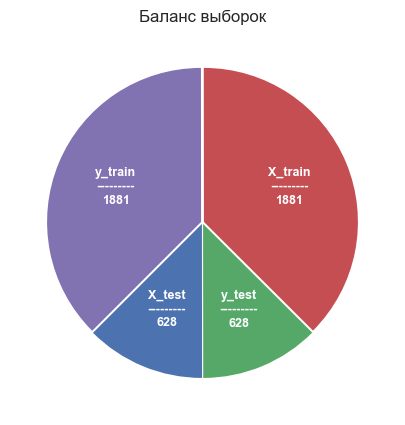

In [22]:
# Разделение у меня уже готово, напомню баланс сил
plot_train_test_split_balance(X_train, X_test, y_train, y_test, startangle=225).show()

[↑ contents](#contents)

<h3 id='ex_8_1'>Обучение дерева решений без параметров</h3>

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


In [23]:
# Инициацию класса и фиттинг напишу в 1 строку.
dtc_8_1 = DecisionTreeClassifier(criterion='entropy', random_state=42).fit(X_train, y_train)

# Предсказание для трейн и тест выборок.
y_train_pred_8_1 = dtc_8_1.predict(X_train)
y_test_pred_8_1 = dtc_8_1.predict(X_test)

# Печать выбранной метрики в види датафрейма.
print('F1 sore 8.1:')
pd.DataFrame(
    [[f1_score(y_train, y_train_pred_8_1, pos_label=0), f1_score(y_train, y_train_pred_8_1)],
     [f1_score(y_test, y_test_pred_8_1, pos_label=0), f1_score(y_test, y_test_pred_8_1)]],
    index=['Train', 'Test']
).T.round(2)

F1 sore 8.1:


,Train,Test
0,1.0,0.80
1,1.0,0.57


<blockquote>

Ваши выводы и рассуждения — *здесь*
<blockquote>

На лицо переобучение модели. Метрика для ушедших клиентов (1) на тестовой выборке практически в половину отличается от метрики на трейн выборке. Я помню про `max_depth`, который обязательно необходимо указывать.)
</blockquote>

[↑ contents](#contents)

<h3 id='ex_8_2'>Стрижка дерева решений</h3>

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


In [24]:
dtc_8_2 = DecisionTreeClassifier(max_depth=8,
                                 criterion='entropy',
                                 min_samples_leaf=10,
                                 random_state=42).fit(X_train, y_train)

y_train_pred_8_2 = dtc_8_2.predict(X_train)
y_test_pred_8_2 = dtc_8_2.predict(X_test)

# Печать выбранной метрики в види датафрейма.
print('F1 sore 8.2:')
pd.DataFrame(
    [[f1_score(y_train, y_train_pred_8_2, pos_label=0), f1_score(y_train, y_train_pred_8_2)],
     [f1_score(y_test, y_test_pred_8_2, pos_label=0), f1_score(y_test, y_test_pred_8_2)]],
    index=['Train', 'Test']
).T.round(2)

F1 sore 8.2:


,Train,Test
0,0.88,0.85
1,0.72,0.64


In [25]:
# Тест модели десижн три класифаер с применением порога вероятности в 0.43, что является оптимальным порогом для этой метрики. 
# Можно еще посмотреть на 0.44, но на тесте f1 хуже, чем у случайного леса, в обоих случаях.
print(classification_report(y_test, pd.Series(dtc_8_2.predict_proba(X_test)[:, 1]).apply(lambda x: 1 if x > 0.43 else 0)))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       424
           1       0.60      0.71      0.65       204

    accuracy                           0.75       628
   macro avg       0.72      0.74      0.73       628
weighted avg       0.77      0.75      0.76       628



<blockquote>

Ваши выводы и рассуждения — *здесь*
<blockquote>

Обозначение максимальной глубины значительно улучшает картину. Метрика для ушедших клиентов (1) сократила разрыв между трейн и тест выборками. Но пока мне не ведомо, как сделать так, чтобы все 4 числа, которые я сейчас вижу на экране - были примерно одинаковые.  
И кстати, параметр минимального числа объектов в листе в данном случае не особо влияет на метрики. Там +/- 0.01.
</blockquote>

[↑ contents](#contents)

<h3 id='ex_8_3'>Обучение модели случайного леса</h3>

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из: 
- 500 деревьев;
- с максимальной глубиной 8;
- критерий информативности — энтропия Шеннона;
- минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


In [26]:
# Инициация класса с параметрами и фиттинг.
rfc_8_3 = RandomForestClassifier(n_estimators=500,
                                 max_depth=8,
                                 criterion='entropy',
                                 min_samples_leaf=10,
                                 random_state=42).fit(X_train, y_train)
# Предсказание на тестовой и трейн выборках.
y_train_pred_8_3 = rfc_8_3.predict(X_train)
y_test_pred_8_3 = rfc_8_3.predict(X_test)

# Печать выбранной метрики в види датафрейма.
print('F1 sore 8.3:')
pd.DataFrame(
    [[f1_score(y_train, y_train_pred_8_3, pos_label=0), f1_score(y_train, y_train_pred_8_3)],
     [f1_score(y_test, y_test_pred_8_3, pos_label=0), f1_score(y_test, y_test_pred_8_3)]],
    index=['Train', 'Test']
).T.round(2)

F1 sore 8.3:


,Train,Test
0,0.90,0.86
1,0.74,0.66


<blockquote>

Ваши выводы и рассуждения — *здесь*
<blockquote>

Использование случайного леса с указанными параметрами улучшают целевую метрику на 0.02. Параметр минимального количества в листе как бы.. снижает разницу показателей между трейн и тест выборками. Т.е. если его закомментить, то трейн метрика улучшится, а тест метрика не изменится для "лояльных клиентов (0)" и ухудшится для (1).
</blockquote>

[↑ contents](#contents)

<h3 id='ex_8_4'>Подбор порога вероятности для случайного леса</h3>

Мы на финишной прямой. 

Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности `threshold`:
    * Сделать предсказание класса по принципу: если `вероятность > threshold`, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

<blockquote>

**Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.
</blockquote>

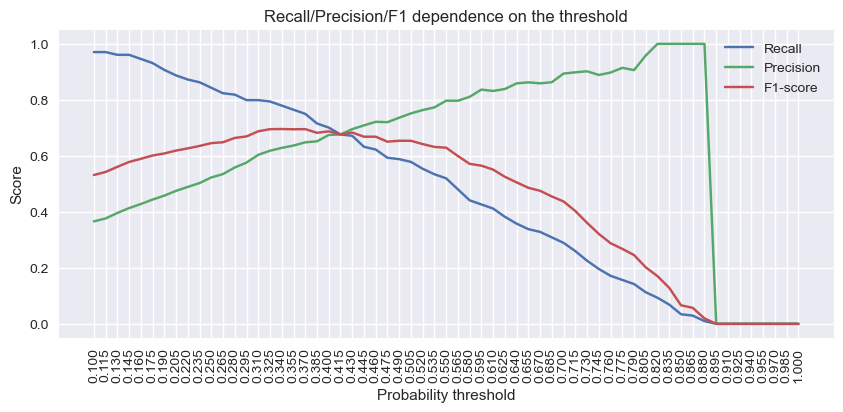

In [27]:
y_test_proba_pred_8_4 = pd.Series(rfc_8_3.predict_proba(X_test)[:, 1])

rpf_threshold_dependence(y_test, y_test_proba_pred_8_4, thresholds=np.arange(0.1, 1, 0.015), xtickrot=90, figsize=(10, 4)).show()

И выведу сразу класс.репорт для теста и f1 для обеих выборок:

In [28]:
y_test_pred_8_4 = y_test_proba_pred_8_4.apply(lambda x: 1 if x > 0.37 else 0)

print(classification_report(y_test, y_test_pred_8_4))

print('f1 для обеих выборок:')
pd.DataFrame(
    [[f1_score(y_train, pd.Series(rfc_8_3.predict_proba(X_train)[:, 1]).apply(lambda x: 1 if x > 0.385 else 0), pos_label=0), f1_score(y_train, pd.Series(rfc_8_3.predict_proba(X_train)[:, 1]).apply(lambda x: 1 if x > 0.385 else 0))],
     [f1_score(y_test, y_test_pred_8_4, pos_label=0), f1_score(y_test, y_test_pred_8_4)]],
    index=['Train', 'Test']
).T.round(2)

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       424
           1       0.65      0.75      0.70       204

    accuracy                           0.79       628
   macro avg       0.76      0.78      0.77       628
weighted avg       0.80      0.79      0.79       628

f1 для обеих выборок:


,Train,Test
0,0.88,0.84
1,0.76,0.70


<blockquote>

Ваши выводы и рассуждения — *здесь*
<blockquote>

С увеличением вероятностного порога увеличивается `precision` и уменьшается `recall`. Причем максимум `recall` наблюдается там, где остальные 2 метрики близки к 0. А потом происходит резкий спад, можно сказать крах и `recall`-а тоже, где он встречается с друзьями. Так же, как и в отметке 0.415. Т.е. произошло 2 встречи лучших друзей, которые помогают нам найти истину.) 

При этом значение `F1-меры` сначала повышается, а потом неуклонно падает.

Я пока максимально не опытный. И! Т.к. в задании сказано выбрать "наибольшее значение на целевой метрике", то я выбрал порог равный 0.37, т.к. на этом "плато", начиная с 0.325 и заканчивая на 0.37 - наблюдается наибольшее значении метрики $F_{1}$-score.  
Так же отмечу, что после подбора порога вероятности метрика для "лояльных клиентов" (0) уменьшилась на 0.02, а для "ушедших" (1) - увеличилась аж на 0.04.  
И наверное я выберу последнюю модель случайного леса. Т.к. модель ДТК из задания 8.2 после подбора своего порога вероятности в 0.43 показывает метрики хуже, чем случайный лес.
</blockquote>

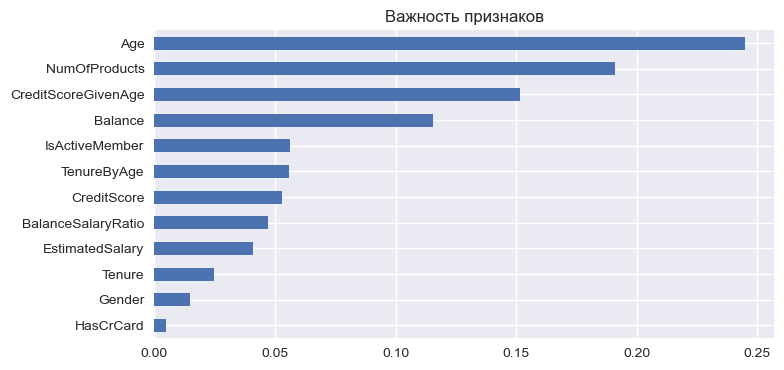

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(rfc_8_3.feature_importances_, index=X_train.columns).sort_values(ascending=True).plot(kind='barh', ax=ax)
ax.set_title('Важность признаков')
plt.show()

[↑ contents](#contents)

<h3 id='ex_8_5'>Предсказание на новых данных</h3>

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

<blockquote>

**Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
</blockquote>

* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

In [34]:
new_client_Vasily = pd.DataFrame({'CreditScore': [601.0],
                                  'Gender': ['Male'],
                                  'Age': [42.0],
                                  'Tenure': [1.0],
                                  'Balance': [98495.72],
                                  'NumOfProducts': [1.0],
                                  'HasCrCard': [1.0],
                                  'IsActiveMember': [0.0],
                                  'EstimatedSalary': [40014.76]})

new_client_Vasily['Gender'] = new_client_Vasily['Gender'].map({'Female': 0, 'Male': 1})
new_client_Vasily['BalanceSalaryRatio'] = new_client_Vasily['Balance'] / new_client_Vasily['EstimatedSalary']
new_client_Vasily['TenureByAge'] = new_client_Vasily['Tenure'] / new_client_Vasily['Age']
new_client_Vasily['CreditScoreGivenAge'] = new_client_Vasily['CreditScore'] / new_client_Vasily['Age']

# Делаем предсказание класса:
print(f'Predicted class: {rfc_8_3.predict(new_client_Vasily)}')
# Делаем предсказание вероятностей:
print(f'Predicted probabilities: {np.round(rfc_8_3.predict_proba(new_client_Vasily), 3)}')

Predicted class: [1]
Predicted probabilities: [[0.386 0.614]]


На самом деле, скажу я вам, Василий - мутный тип. Его уход составляет почти 50%, как и его лояльность. И раз такой клиент можно сказать "колеблющийся", для него и для таких, как он, необходимо запустить какую-нибудь программу лояльности, чтобы число 0.386 - увеличилось, а 0.614 - наоборот.) Такая вот у меня мысль. А так, Василий - потенциальный ливер.)

[↑ contents](#contents)

<h3 id='addresearch'>Дополнительное исследование</h3>Можно не смотреть

Мне стало интересно попробовать улучшить метрику.  
Я перебрал различные варианты набора признаков, пытался их бинировать, выражать друг через друга..  
Но самым оптимальным оказался до смешного банальный вариант:

In [78]:
bonus_df = models_df.copy()

# Да да, для лучшего результата нужно удалить ранее созданные признаки.))
bonus_df.drop(['TenureByAge', 'CreditScoreGivenAge'], axis=1, inplace=True)

X, y = bonus_df.drop('Exited', axis=1), bonus_df['Exited']

# И убрать стратификацию по таргету.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

# Далее перебор по не большому диапазону параметров:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [6, 8, 10],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [8, 12]
}
# Тут важным параметром оказался именно balanced_subsample.
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced_subsample', random_state=42),
                    param_grid,
                    scoring='f1_macro',
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    n_jobs=-1)
grid.fit(X_train, y_train)

print(classification_report(y_test, grid.predict(X_test)))

pd.DataFrame(
    [[f1_score(y_train, grid.predict(X_train), pos_label=0), f1_score(y_train, grid.predict(X_train))],
     [f1_score(y_test, grid.predict(X_test), pos_label=0), f1_score(y_test, grid.predict(X_test))]],
    index=['Train', 'Test']
).T.round(2)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       375
           1       0.73      0.79      0.76       203

    accuracy                           0.82       578
   macro avg       0.80      0.81      0.81       578
weighted avg       0.83      0.82      0.82       578



,Train,Test
0,0.87,0.86
1,0.75,0.76


Получаются прекрасные метрики с отсутствием переобучения.  
И подбор порога:

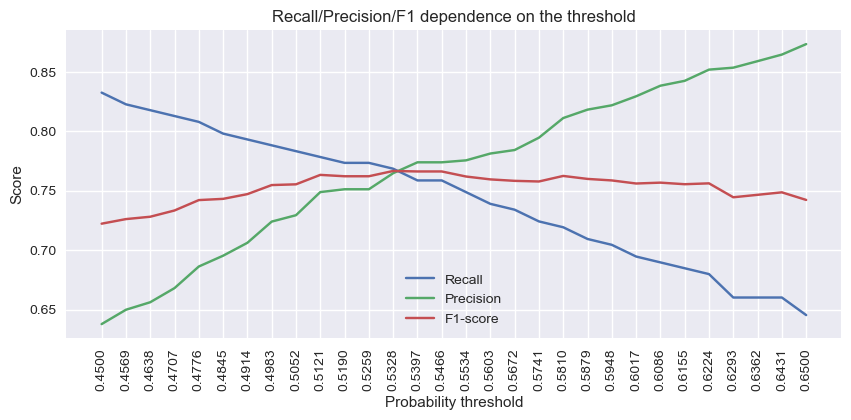

In [81]:
rpf_threshold_dependence(y_test, pd.Series(grid.predict_proba(X_test)[:, 1]), thresholds=np.linspace(0.45, 0.65, 30), xtickrot=90, figsize=(10, 4)).show()

Я возьму порог 0.555, т.к. только с этим порогом f1 на тесте увеличивается.)

In [85]:
bonus_threshold = 0.555
bonus_y_pred_vs_th_old = pd.Series(grid.predict_proba(X_test)[:, 1]).apply(lambda x: 1 if x > bonus_threshold else 0)

print(classification_report(y_test, bonus_y_pred_vs_th_old))

pd.DataFrame(
    [[f1_score(y_train, grid.predict(X_train), pos_label=0), f1_score(y_train, grid.predict(X_train))],
     [f1_score(y_test, bonus_y_pred_vs_th_old, pos_label=0), f1_score(y_test, bonus_y_pred_vs_th_old)]],
    index=['Train', 'Test']
).T.round(2)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       375
           1       0.78      0.75      0.77       203

    accuracy                           0.84       578
   macro avg       0.83      0.82      0.82       578
weighted avg       0.84      0.84      0.84       578



,Train,Test
0,0.87,0.88
1,0.75,0.77


Важность признаков выводить не буду, там всё то же самое и самый ценный признак - возраст.) Эйджистская модель.))

[↑ contents](#contents)